In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Inspection & Preprocessing

In [2]:
# Loading Dataset
data = pd.read_csv("events.csv")

In [3]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     885129 non-null  object 
 1   event_type     885129 non-null  object 
 2   product_id     885129 non-null  int64  
 3   category_id    885129 non-null  int64  
 4   category_code  648910 non-null  object 
 5   brand          672765 non-null  object 
 6   price          885129 non-null  float64
 7   user_id        885129 non-null  int64  
 8   user_session   884964 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 60.8+ MB


In [5]:
data.describe()

,product_id,category_id,price,user_id
count,8.851290e+05,8.851290e+05,885129.000000,8.851290e+05
mean,1.906621e+06,2.144423e+18,146.328713,1.515916e+18
std,1.458708e+06,6.165105e+14,296.807683,3.554165e+07
min,1.020000e+02,2.144416e+18,0.220000,1.515916e+18
25%,6.988030e+05,2.144416e+18,26.460000,1.515916e+18
50%,1.452883e+06,2.144416e+18,65.710000,1.515916e+18
75%,3.721194e+06,2.144416e+18,190.490000,1.515916e+18
max,4.183880e+06,2.227847e+18,64771.060000,1.515916e+18


* Duplicate Handling: Drops any duplicate rows to avoid redundancy.

In [6]:
# Finding Number Of Duplicate rows
print("Duplicate Rows:",data.duplicated().sum())

Duplicate Rows: 655


In [7]:
# Number of Rows Before deleting Duplicate rows 
data.shape

(885129, 9)

In [8]:
# Deleting Duplicate Rows 
data=data.drop_duplicates()

In [9]:
# Number of Rows After deleting Duplicate rows
data.shape

(884474, 9)

In [10]:
# Finding the number and Percentage of Null values in dataset Feature Wise
print("Number Of Rows: \n",data.isnull().sum())
# print("Column Wise Null values Percentage: \n",(data.isnull().sum()/data.shape[0])*100)
print("Column Wise Null values Percentage: \n",(data.isnull().sum()/len(data))*100)

Number Of Rows: 
 event_time            0
event_type            0
product_id            0
category_id           0
category_code    236047
brand            212232
price                 0
user_id               0
user_session        162
dtype: int64
Column Wise Null values Percentage: 
 event_time        0.000000
event_type        0.000000
product_id        0.000000
category_id       0.000000
category_code    26.687839
brand            23.995279
price             0.000000
user_id           0.000000
user_session      0.018316
dtype: float64


In [11]:
# Total Null Values Percentage Throughout the DataSet
print("Total percentage of the null values: ",(data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100),"%")

Total percentage of the null values:  5.633492649617488 %


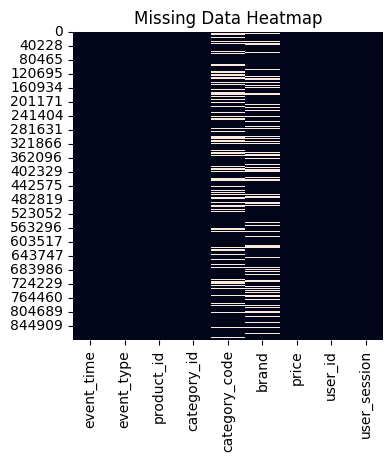

In [12]:
# Visualize missing data using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

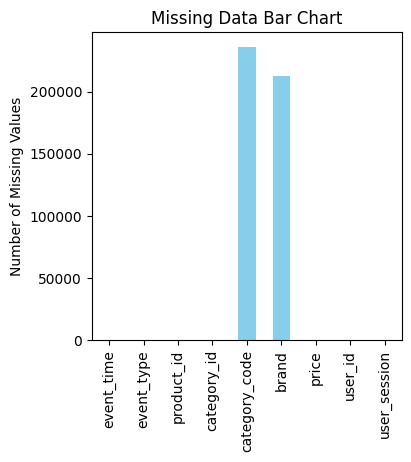

In [13]:
# Visualize missing data using a bar chart
missing_data=data.isnull().sum()
plt.figure(figsize=(4,4))
missing_data.plot(kind='bar', color='skyblue')
plt.title('Missing Data Bar Chart')
plt.ylabel('Number of Missing Values')
plt.show()

* Total null values percentage in "category_code,brand,user_session" columns/features is less than 50% so we can delete the rows which having nullvalues 

    -->  category_code = 26.7% null values

    -->  brand = 23.9% null values

    -->  user_session = 0.018 % null values

* Total dataset contains the 5.63 % null values so we can delete them all

In [14]:
# Removing rows with null values from the data Set
data = data.dropna()

In [15]:
# Convert 'event_time' to datetime
data['event_time'] = pd.to_datetime(data['event_time'])

In [16]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW
7,2020-09-24 11:58:24+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw
9,2020-09-24 11:58:31+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39


# Exploratory Data Analysis (EDA)

* Time Series Plot: Tracks view, cart, and purchase events over time.

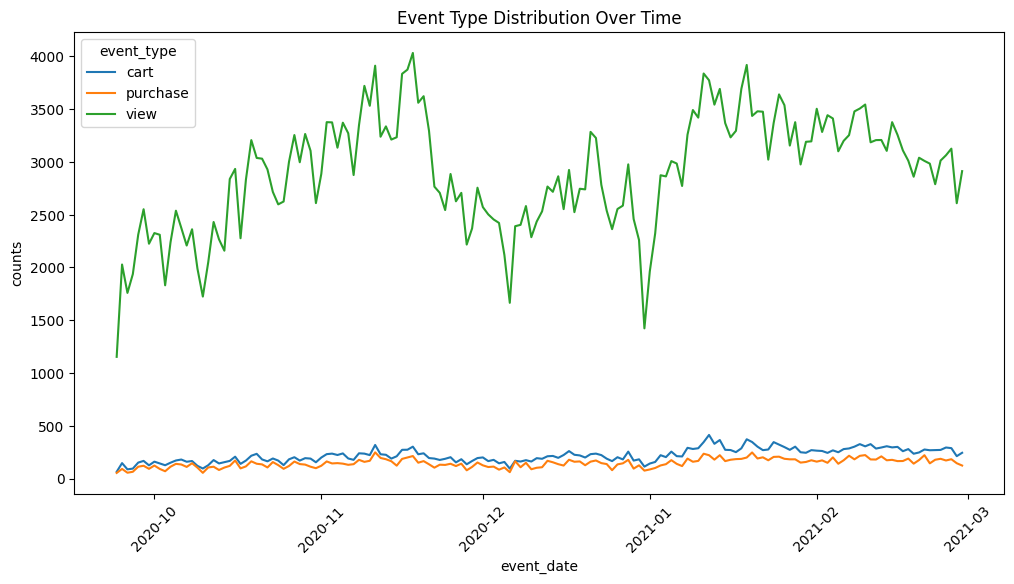

In [17]:
# Event type distribution over time
data['event_date'] = data['event_time'].dt.date
event_counts = data.groupby(['event_date', 'event_type']).size().reset_index(name='counts')
plt.figure(figsize=(12, 6))
sns.lineplot(data=event_counts, x='event_date', y='counts', hue='event_type')
plt.title('Event Type Distribution Over Time')
plt.xticks(rotation=45)
plt.show()

Popularity Analysis: Highlights the most frequent brands

C:\Users\sasiv\AppData\Local\Temp\ipykernel_19188\279301535.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='brand', order=data['brand'].value_counts().index[:10], palette='viridis')


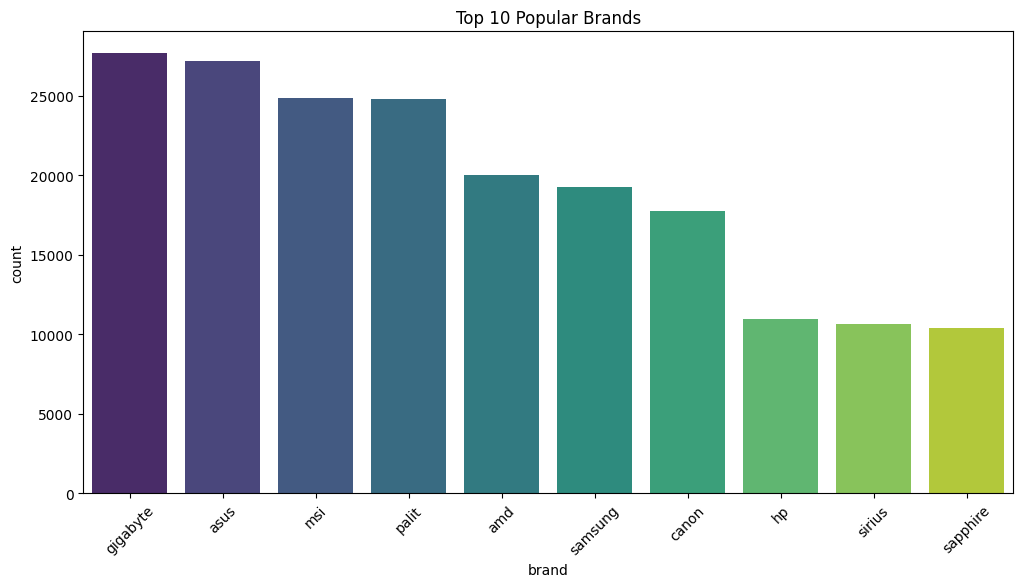

In [18]:
# Brand popularity
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='brand', order=data['brand'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Popular Brands')
plt.xticks(rotation=45)
plt.show()

Popularity Analysis: Highlights the most frequent category

C:\Users\sasiv\AppData\Local\Temp\ipykernel_19188\3477975058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='category_code', order=data['category_code'].value_counts().index[:10], palette='plasma')


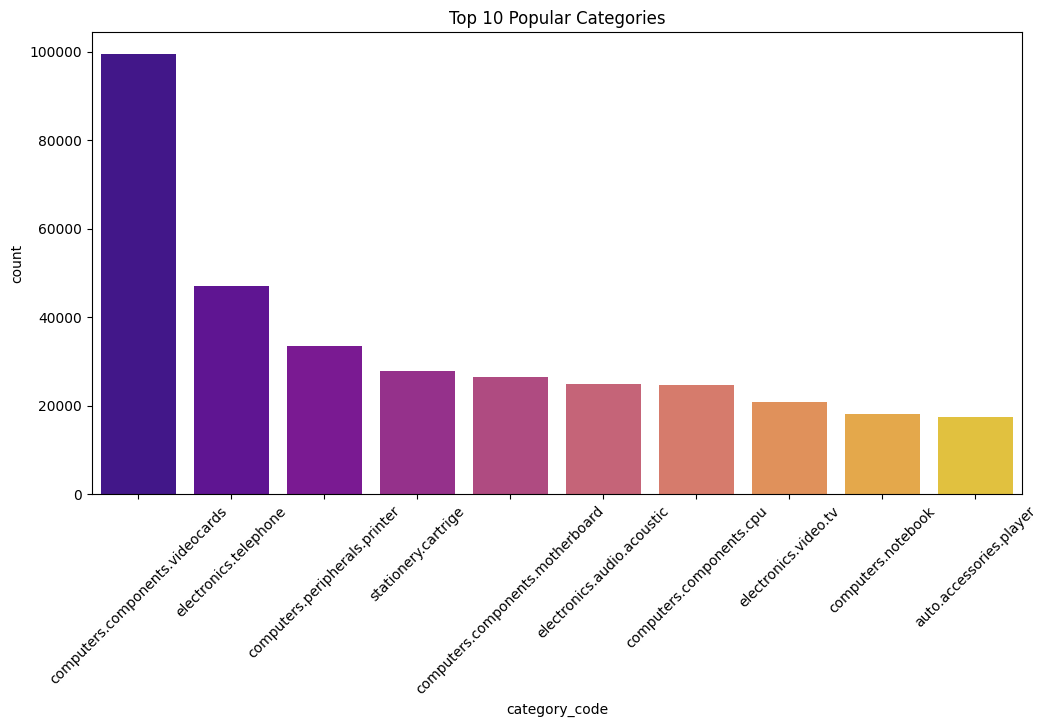

In [19]:
# category popularity
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='category_code', order=data['category_code'].value_counts().index[:10], palette='plasma')
plt.title('Top 10 Popular Categories')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='event_type', ylabel='count'>

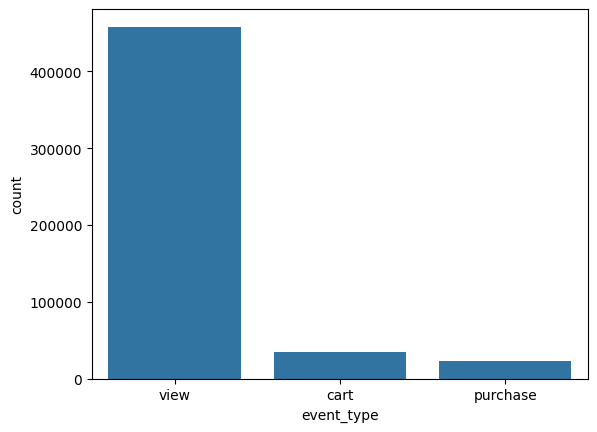

In [20]:
sns.countplot(x='event_type', data=data)

In [45]:
# User-level summaries
user_summary = data.groupby('user_id').agg({
    'price': ['sum', 'mean'],
    'event_time': ['max','min','count'],
    'event_date': lambda x: (x.max() - x.min()).days,
    'event_type':lambda x: (x == 'view').sum() // max((x == 'purchase').sum(), 1),  # View to Purchase Ratio
    # 'product_id': lambda x: len(x.unique())
}).reset_index()

1. Grouping by user_id:
    * The dataset is grouped by user_id so that calculations can be performed for each unique user.

2. Aggregation Operations:

    a. price:
        
        -->  sum: Calculates the total amount spent by the user.
        -->  mean: Calculates the average spending per event for the user.

    b. event_time:
     
        -->  max: Finds the most recent activity timestamp for the user.
        -->  min: Finds the earliest activity timestamp for the user.
        -->  count: Counts the total number of events (e.g., views, carts     purchases) for the user.

    c. event_date:

        -->  A lambda function computes the active duration for the user by subtracting the earliest date from the latest date.

    d. event_type:

        -->  View-to-Purchase Ratio: Highlights users browsing without purchasing.
        -->  A lambda function calculates the view-to-purchase ratio:
        -->  (x == 'view').sum(): Counts the number of "view" events for the user.
        -->  (x == 'purchase').sum(): Counts the number of "purchase" events for the user.
        -->  max(..., 1): Ensures the denominator is at least 1 to avoid division by zero.
        -->  //: Integer division to produce the ratio.

3. Resetting the Index:
    * reset_index():Converts the grouped data into a DataFrame by resetting the index (user_id becomes a column).

In [46]:
user_summary.head()

user_id    price                            event_time  \
                            sum        mean                       max   
0  1515915625353226922    76.48   76.480000 2020-10-29 11:28:35+00:00   
1  1515915625353230683   814.93   62.686923 2020-12-12 10:33:09+00:00   
2  1515915625353230922   274.40  274.400000 2020-10-02 08:23:40+00:00   
3  1515915625353234047  5467.71  156.220286 2021-02-18 09:11:44+00:00   
4  1515915625353236157    52.49   52.490000 2021-02-11 15:50:40+00:00   

                                  event_date event_type  
                        min count   <lambda>   <lambda>  
0 2020-10-29 11:28:35+00:00     1          0          1  
1 2020-11-09 08:52:51+00:00    13         33         13  
2 2020-10-02 08:23:40+00:00     1          0          1  
3 2020-09-29 16:01:54+00:00    35        142         35  
4 2021-02-11 15:50:40+00:00     1          0          1

* Renaming the columns of the user_summary DataFrame to more descriptive names.

In [47]:
user_summary.columns = ['user_id', 'total_spent', 'avg_spent', 'event_max','event_min','event_count', 'active_days','view_to_Purchase_ratio']

In [48]:
user_summary.head()

,user_id,total_spent,avg_spent,event_max,event_min,event_count,active_days,view_to_Purchase_ratio
0,1515915625353226922,76.48,76.480000,2020-10-29 11:28:35+00:00,2020-10-29 11:28:35+00:00,1,0,1
1,1515915625353230683,814.93,62.686923,2020-12-12 10:33:09+00:00,2020-11-09 08:52:51+00:00,13,33,13
2,1515915625353230922,274.40,274.400000,2020-10-02 08:23:40+00:00,2020-10-02 08:23:40+00:00,1,0,1
3,1515915625353234047,5467.71,156.220286,2021-02-18 09:11:44+00:00,2020-09-29 16:01:54+00:00,35,142,35
4,1515915625353236157,52.49,52.490000,2021-02-11 15:50:40+00:00,2021-02-11 15:50:40+00:00,1,0,1


In [49]:
# Calculate days since last event for each user
latest_event_date = data['event_time'].max()
user_summary['days_since_last_event'] = (latest_event_date - user_summary['event_max']).dt.days

1. Find the Latest Event Date in the Dataset:

    * Retrieves the most recent date (event_date) from the dataset.
    * This is a single date representing the last activity recorded across all users.

2. Localize the Timezone of latest_event_date:
    * Converts latest_event_date to a timezone-aware datetime object using the timezone of user_summary['event_max'].

In [50]:
user_summary.head()

,user_id,total_spent,avg_spent,event_max,event_min,event_count,active_days,view_to_Purchase_ratio,days_since_last_event
0,1515915625353226922,76.48,76.480000,2020-10-29 11:28:35+00:00,2020-10-29 11:28:35+00:00,1,0,1,122
1,1515915625353230683,814.93,62.686923,2020-12-12 10:33:09+00:00,2020-11-09 08:52:51+00:00,13,33,13,78
2,1515915625353230922,274.40,274.400000,2020-10-02 08:23:40+00:00,2020-10-02 08:23:40+00:00,1,0,1,149
3,1515915625353234047,5467.71,156.220286,2021-02-18 09:11:44+00:00,2020-09-29 16:01:54+00:00,35,142,35,10
4,1515915625353236157,52.49,52.490000,2021-02-11 15:50:40+00:00,2021-02-11 15:50:40+00:00,1,0,1,17


Defines churn as inactivity for 30+ days, which is common in e-commerce retention strategies.

In [51]:
# Label churn (e.g., churned if no activity for 30+ days)
user_summary['churn'] = (user_summary['days_since_last_event'] > 30).astype(int)

In [52]:
user_summary.head()

,user_id,total_spent,avg_spent,event_max,event_min,event_count,active_days,view_to_Purchase_ratio,days_since_last_event,churn
0,1515915625353226922,76.48,76.480000,2020-10-29 11:28:35+00:00,2020-10-29 11:28:35+00:00,1,0,1,122,1
1,1515915625353230683,814.93,62.686923,2020-12-12 10:33:09+00:00,2020-11-09 08:52:51+00:00,13,33,13,78,1
2,1515915625353230922,274.40,274.400000,2020-10-02 08:23:40+00:00,2020-10-02 08:23:40+00:00,1,0,1,149,1
3,1515915625353234047,5467.71,156.220286,2021-02-18 09:11:44+00:00,2020-09-29 16:01:54+00:00,35,142,35,10,0
4,1515915625353236157,52.49,52.490000,2021-02-11 15:50:40+00:00,2021-02-11 15:50:40+00:00,1,0,1,17,0


# Model Training

In [53]:
from sklearn.preprocessing import StandardScaler
features_to_scale = ['total_spent', 'avg_spent']

standard_scaler = StandardScaler()
data_standard_scaled = user_summary.copy()
user_summary[features_to_scale] = standard_scaler.fit_transform(user_summary[features_to_scale])


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Prepare features and labels
X = user_summary[['total_spent', 'avg_spent', 'event_count', 'active_days','view_to_Purchase_ratio']]
y = user_summary['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare models
models = {'RandomForest': RandomForestClassifier(random_state=42), 'LogisticRegression': LogisticRegression()}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score=model.score(X_test,y_test)*100
    print(f"{name} Classification Report with Score :{score}\n", classification_report(y_test, y_pred))


RandomForest Classification Report with Score :77.33970441160129
               precision    recall  f1-score   support

           0       0.38      0.13      0.20      9404
           1       0.80      0.94      0.87     35591

    accuracy                           0.77     44995
   macro avg       0.59      0.54      0.53     44995
weighted avg       0.72      0.77      0.73     44995

LogisticRegression Classification Report with Score :79.2065785087232
               precision    recall  f1-score   support

           0       0.62      0.01      0.03      9404
           1       0.79      1.00      0.88     35591

    accuracy                           0.79     44995
   macro avg       0.71      0.51      0.45     44995
weighted avg       0.76      0.79      0.70     44995



# Interpretation & Explanation

1. Feature Importance Plot
    * Feature importance highlights which features most influence predictions in a machine learning model.

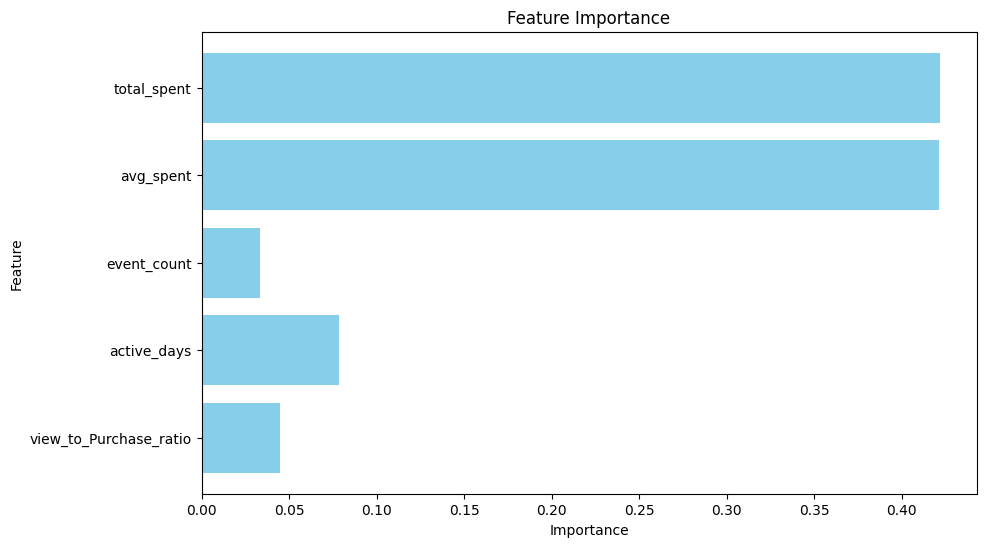

In [57]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

# Feature importance
feature_importances = clf.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(4, 4))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

2. Feature Distributions
    * Analyze individual feature distributions by churn status.

C:\Users\sasiv\AppData\Local\Temp\ipykernel_19188\3056986790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=user_summary, palette='Set3')


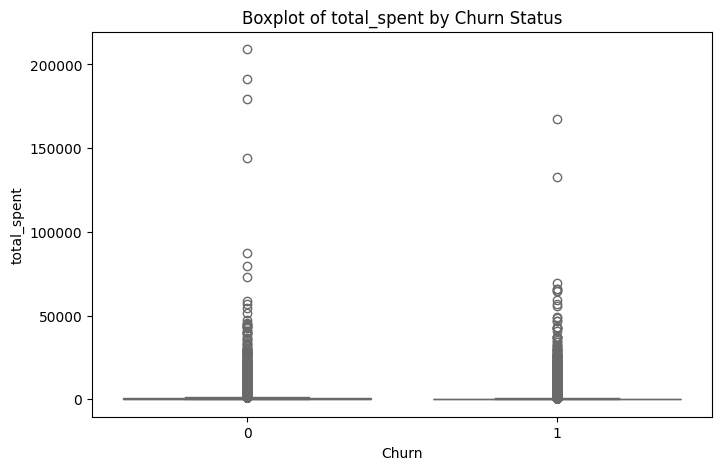

C:\Users\sasiv\AppData\Local\Temp\ipykernel_19188\3056986790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=user_summary, palette='Set3')


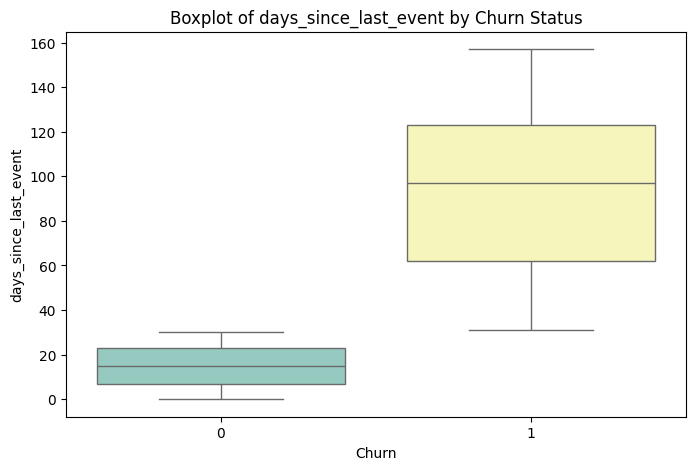

C:\Users\sasiv\AppData\Local\Temp\ipykernel_19188\3056986790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=user_summary, palette='Set3')


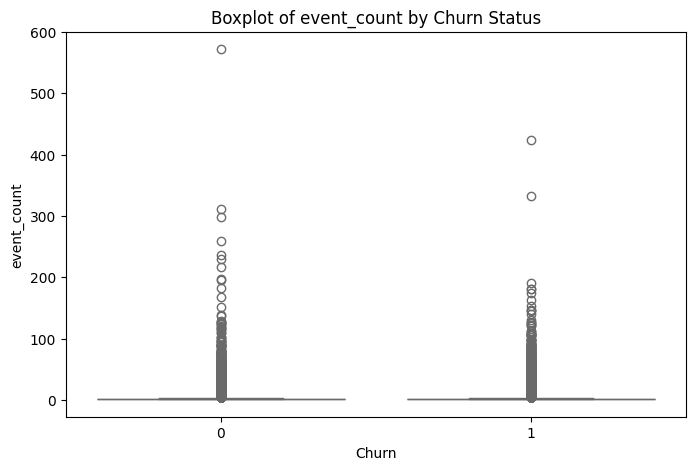

In [ ]:
# Boxplots for features by churn
for feature in ['total_spent','days_since_last_event','event_count']:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x='churn', y=feature, data=user_summary, palette='Set3')
    plt.title(f'Boxplot of {feature} by Churn Status')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()


3. Feature Distributions
    * Analyze individual feature distributions by churn status.

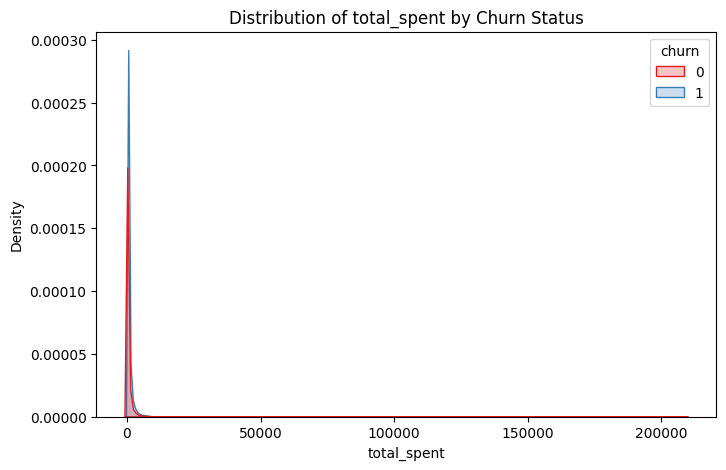

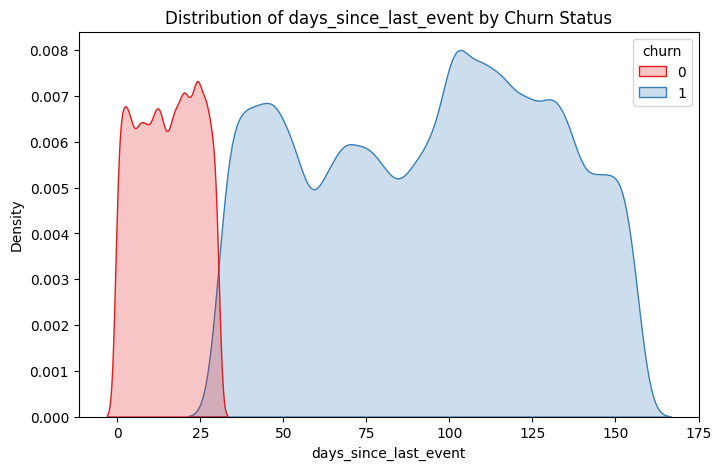

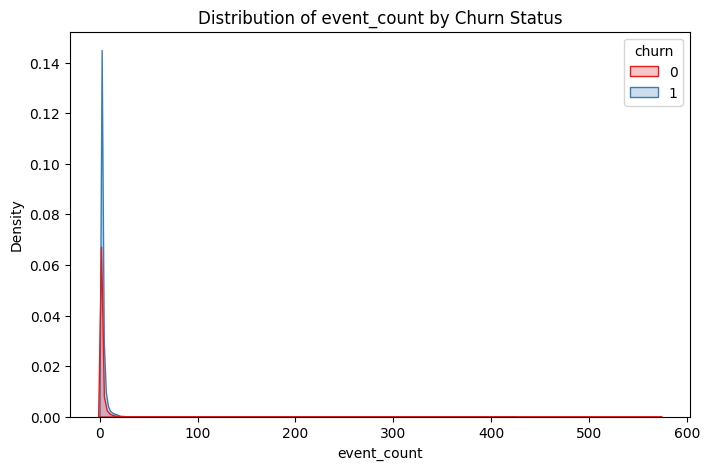

In [ ]:
# Plot feature distributions grouped by churn
for feature in ['total_spent', 'days_since_last_event', 'event_count']:
    plt.figure(figsize=(4, 4))
    sns.kdeplot(data=user_summary, x=feature, hue='churn', fill=True, palette='Set1')
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

4. Histogram for Target Variable
    * Visualize the distribution of the target variable (churn).

C:\Users\sasiv\AppData\Local\Temp\ipykernel_19188\3690880050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=user_summary, palette='Set2')


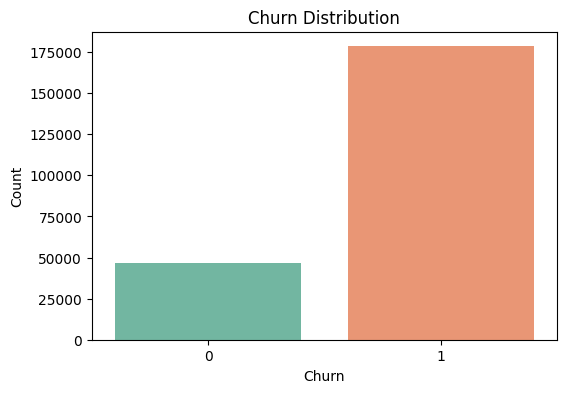

In [33]:
# Histogram of churn
plt.figure(figsize=(4, 4))
sns.countplot(x='churn', data=user_summary, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


5. Correlation Heatmap
    * Analyze feature correlations.

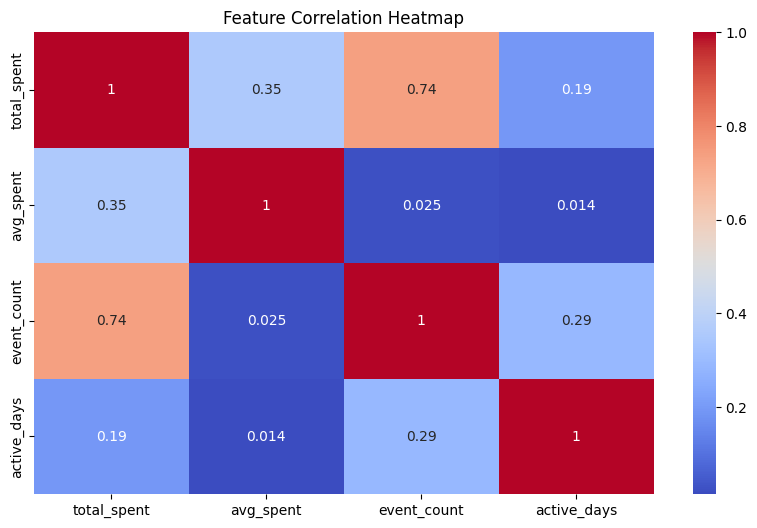

In [34]:
# Correlation heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(user_summary[['total_spent', 'avg_spent', 'event_count', 'active_days',]].corr(), 
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


6. Pairwise Scatter Plots
    * Visualize relationships between features and the target variable.

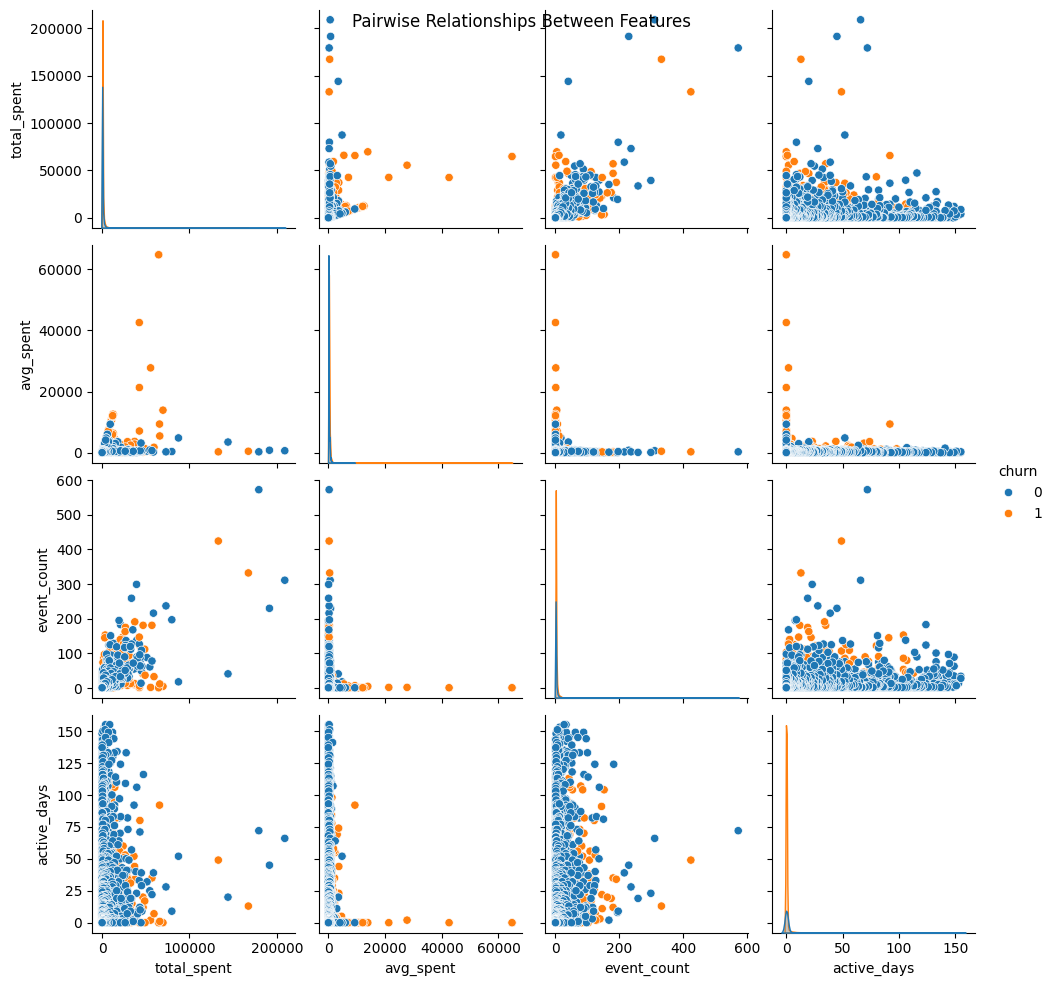

In [35]:
# Pairplot for numerical features
sns.pairplot(user_summary, vars=['total_spent', 'avg_spent', 'event_count', 'active_days',], hue='churn')
plt.suptitle('Pairwise Relationships Between Features')
plt.show()

# Recommendations & Conclusions

Recommendations & Conclusions for Churn Reduction
Based on the analysis, predictions, and feature insights from the dataset, here are actionable strategies for reducing user churn:

1. Target Inactive Users
    * Insight:
        
        The days_since_last_event feature indicates that users inactive for more than 15–30 days are likely to churn.

    Recommendations:
        
        Automated Reminders:Send personalized reminders (via email, SMS, or app notifications) to users who haven’t interacted in 15+ days.
            
            Include messages like:
                “We miss you! Check out our latest deals.”
                “Special offers waiting just for you—don’t miss out!”
    
    Gamification:
        
        Introduce loyalty programs that reward users for regular engagement (e.g., points, badges).
        
        Create streak-based incentives to encourage users to log in or make purchases consistently.
2. Focus on High Spenders at Risk
    * Insight:Features like total_spent and avg_spent highlight users with significant spending but declining activity.
        
        Recommendations:
            
            Exclusive Discounts:Offer special discounts or limited-time coupons to high spenders who haven’t interacted recently.
            
            Example: “Exclusive 20% off just for you—shop before [date]!”
        
        Personalized Engagement:
        
            Send tailored product recommendations based on past purchases.
                            
            Highlight complementary products or services to reignite interest.
       
        Premium Membership:
            Introduce a VIP program with perks like early access to sales or free shipping for top spenders.

3. Convert Browsers into Buyers
    * Insight:The view_to_Purchase_ratio feature shows users who browse extensively without making purchases are more likely to churn.

        Recommendations:
            
            Cart Abandonment Campaigns:Send follow-up emails for items left in the cart.
            
            Example: “Your cart is waiting—checkout now and get 10% off!”
       
        Free Trials or Samples:Offer free trials for products/services viewed frequently but not purchased.
            
            Example: “Try before you buy—your first month free!”
       
        Limited-Time Offers:
            
            Create urgency for undecided users by showcasing time-sensitive deals.
            
            Example: “Hurry! Only 2 hours left to grab your favorite item at 30% off!”

4. Re-Engage Long-Time Users

    * Insight:Users with many active days (active_days) but recent inactivity can be valuable to retain.

        Recommendations:

            Anniversary Campaigns:Celebrate user milestones (e.g., 1-year membership) with personalized offers.

            Example: “Happy 1-year anniversary! Enjoy 15% off as a thank you.”

        Reactivation Offers:Provide exclusive rewards to users who return after a period of inactivity.

            Example: “We want you back! Redeem this 25% discount before it’s gone.”

5. Monitor and Improve User Experience

    * Insight:Low event counts (event_count) and short active durations (active_days) could indicate usability issues or dissatisfaction.

        Recommendations:

            Feedback Collection:Survey churned or inactive users to understand pain points.

            Example: “Help us improve—tell us why you stopped shopping with us!”

        Simplify the Journey:Optimize website/app navigation to reduce friction.

        Introduce one-click checkout or a faster login process.

6. Proactive Communication

    * Insight:Proactive engagement can reduce churn for users showing early signs of inactivity.

        Recommendations:

            Proactive Chat Support:Use chatbots or live agents to assist users during product browsing.

            Example: “Looking for something specific? Let us help!”

        Event-Based Notifications:Notify users about relevant product restocks or price drops.

            Example: “The product you viewed is back in stock—order now!”

# Conclusions

    By leveraging insights from user behavior and implementing these recommendations:

    Expected Impact: 
            Increase retention, enhance user satisfaction, and boost revenue.
    Data-Driven Actions: 
            These strategies align with churn prediction insights, ensuring efficient resource allocation for retention efforts.